In [18]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.integrate import quad
from scipy.integrate import solve_ivp

1-Cubic Spline Interpolation

In [10]:
from scipy.interpolate import interp1d

array(-23.84636087)

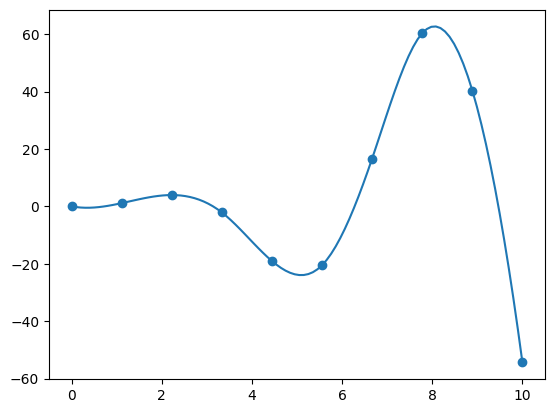

In [16]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)
f = interp1d(x , y , kind="cubic")
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)
f(5)

2-Interpolation using real data

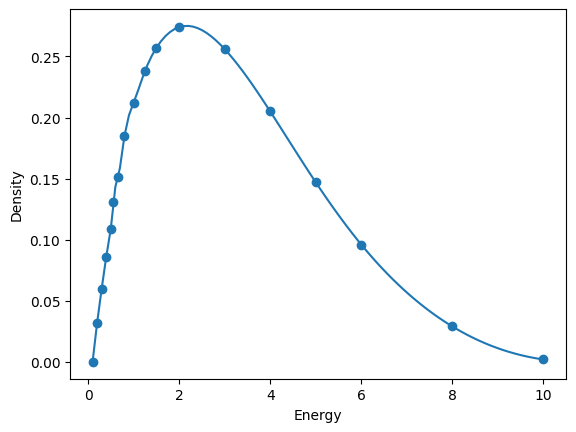

In [28]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.integrate import quad
from scipy.integrate import solve_ivp
E_data = np.array([0.1 , 0.2  , 0.3 , 0.4 , 0.5 , 0.55 , 0.662 , 0.8 , 1. , 1.25 , 1.5 , 2.  , 3. , 4. , 5. , 6. , 8. , 10.])
S_data = np.array([0. , 0.032 , 0.06 , 0.086 , 0.109 , 0.131 , 0.151 , 0.185 , 0.212 , 0.238 , 0.257 , 0.274 , 0.256 , 0.205 , 0.147 , 0.096 ,0.029, 0.002])
plt.scatter(E_data , S_data)
plt.xlabel("Energy")
plt.ylabel("Density")
s_f = interp1d(E_data , S_data , 'cubic')
x_dense = np.linspace(E_data.min(), E_data.max(), 100)
y_dense = s_f(x_dense)
plt.plot(x_dense, y_dense)


3-Newton Forward Interpolation method

In [ ]:
def u_cal(u, n):

	temp = u;
	for i in range(1, n):
		temp = temp * (u - i);
	return temp;

def fact(n):
	f = 1;
	for i in range(2, n + 1):
		f *= i;
	return f;

n = 5;
x = [ 1891, 1901, 1911, 1921,1931 ];

y = [[0 for i in range(n)]
		for j in range(n)];
y[0][0] = 46;
y[1][0] = 60;
y[2][0] = 81;
y[3][0] = 93;
y[4][0] = 101;


for i in range(1, n):
	for j in range(n - i):
		y[j][i] = y[j + 1][i - 1] - y[j][i - 1];

for i in range(n):
	print(x[i], end = "\t");
	for j in range(n - i):
		print(y[i][j], end = "\t");
	print("");

value = 1896;

sum = y[0][0];
u = (value - x[0]) / (x[1] - x[0]);
for i in range(1,n):
	sum = sum + (u_cal(u, i) * y[0][i]) / fact(i);

print("\nValue at", value,
	"is", round(sum, 6));



4-Newton Backward Interpolation Method

In [1]:
def u_cal(u, n):
	temp = u
	for i in range(n):
		temp = temp * (u + i)
	return temp

def fact(n):
	f = 1
	for i in range(2, n + 1):
		f *= i
	return f


n = 5
x = [1891, 1901, 1911, 1921, 1931]

y = [[0.0 for _ in range(n)] for __ in range(n)]
y[0][0] = 46
y[1][0] = 66
y[2][0] = 81
y[3][0] = 93
y[4][0] = 101

for i in range(1, n):
	for j in range(n - 1, i - 1, -1):
		y[j][i] = y[j][i - 1] - y[j - 1][i - 1]


for i in range(n):
	for j in range(i + 1):
		print(y[i][j], end="\t")
	print()


value = 1925


sum = y[n - 1][0]
u = (value - x[n - 1]) / (x[1] - x[0])
for i in range(1, n):
	sum = sum + (u_cal(u, i) * y[n - 1][i]) / fact(i)

print("\n Value at", value, "is", sum)




46	
66	20	
81	15	-5	
93	12	-3	2	
101	8	-4	-1	-3	

 Value at 1925 is 103.49792


5-Newton Divided Difference 

In [ ]:
def proterm(i, value, x):
	pro = 1;
	for j in range(i):
		pro = pro * (value - x[j]);
	return pro;

def dividedDiffTable(x, y, n):

	for i in range(1, n):
		for j in range(n - i):
			y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
									(x[j] - x[i + j]));
	return y;

def applyFormula(value, x, y, n):

	sum = y[0][0];

	for i in range(1, n):
		sum = sum + (proterm(i, value, x) * y[0][i]);
	
	return sum;

def printDiffTable(y, n):

	for i in range(n):
		for j in range(n - i):
			print(round(y[i][j], 4), "\t",
							end = " ");

		print("");

n = 4;
y = [[0 for i in range(10)]
		for j in range(10)];
x = [ 5, 6, 9, 11 ];

y[0][0] = 12;
y[1][0] = 13;
y[2][0] = 14;
y[3][0] = 16;

y=dividedDiffTable(x, y, n);

printDiffTable(y, n);


value = 7;

print("\nValue at", value, "is",
		round(applyFormula(value, x, y, n), 2))




6-Langrange Interpolation  Method for unequal interval

In [43]:
class Data:
	def __init__(self, x, y):
		self.x = x
		self.y = y

def interpolate(f: list, xi: int, n: int) -> float:

	result = 0.0
	for i in range(n):

		term = f[i].y
		for j in range(n):
			if j != i:
				term = term * (xi - f[j].x) / (f[i].x - f[j].x)

		result += term

	return result

if __name__ == "__main__":


	f = [Data(-1, -8), Data(0, 3), Data(2, 1), Data(3, 2)]


	print("Value of f(1) is :", interpolate(f, 1, 4))




Value of f(1) is : 3.666666666666666


7-Cubic Spline

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([1.0000, 1.2214, 1.4918, 1.8221, 2.2255, 2.7183])
cs = CubicSpline(x, y)
x_new = 0.5
Pn = cs(x_new)
print(f"Pn({x_new}) = {Pn}")


8-Runge-Kutta 2nd order

In [ ]:
import math

def rk2_solver(f, y0, t0, tf, h):
    t = t0
    y = y0
    while t <= tf:
        k1 = h * f(t, y)
        k2 = h * f(t + h, y + k1)
        y = y + (k1 + k2) / 2
        t = t + h
    return y

def f(t, y):
    return math.sin(t) - y

y0 = 0
t0 = 0
tf = 10
h = 0.1

y_sol = rk2_solver(f, y0, t0, tf, h)

print("Solution at t = ", tf, " is: ", y_sol)


9-Runge-Kutta-4th Order

In [ ]:
import math

def rk4_solver(f, y0, t0, tf, h):
    t = t0
    y = y0
    while t <= tf:
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t + h
    return y

import numpy as np

def f(t, y):
    return math.sin(t) - y

y0 = 0
t0 = 0
tf = 10
h = 0.1

y_sol = rk4_solver(f, y0, t0, tf, h)

print("Solution at t = ", tf, " is: ", y_sol)
